# Fundamentos del manejo del BlobStorage con el SDK de Python

### Introducción a Microsoft Azure Blob Storage

En este notebook aprenderemos a cómo utilizar el almacenamiento de Azure Blob Storage con Python para almacenar datos no estructurados como imágenes, videos, audios o documentos.


Entre los servicios de almacenamiento de Azure se encuentran:

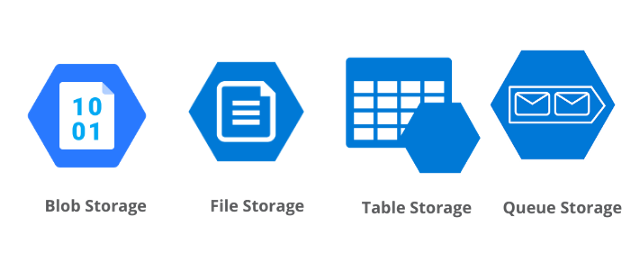

**Almacenamiento de blobs o Blob Storage**
Blob Significa objeto binario grande, debe usar el almacenamiento de blobs para almacenar una gran cantidad de datos no estructurados como archivos de texto o binarios, pero también puede usar blobs para almacenar archivos pequeños. Se puede acceder a blobs a través de http y https.


**Almacenamiento de archivos**
El almacenamiento de archivos permite crear recursos compartidos de archivos de red a los que se puede acceder mediante SMB. Esta es una forma de compartir archivos con otras personas, además de compartir archivos con acceso de lectura y escritura entre máquinas virtuales.

**Table Storage** Table Storage es un servicio de base de datos NoSQL. NoSQL significa que esta base de datos no tiene un esquema para definir tablas como en la base de datos relacional, sino que el almacenamiento de tablas proporciona un almacén de valores clave con un diseño sin esquema. El almacenamiento de table storage es ideal para almacenar datos estructurados no relacionales.

**Queue Storage** El almacenamiento en cola se utiliza para almacenar una gran cantidad de mensajes.Se puede utilizar el almacenamiento en cola como un búfer entre sus clientes y su back-end.

### Los contenedores del Blob Storage

Azure Blob Storage está optimizado para almacenar cantidades masivas de datos no estructurados. Los datos no estructurados son datos que no se adhieren a una definición o modelo de datos en particular, como texto o datos binarios. Blob Storage ofrece tres tipos de recursos:

1. La cuenta de almacenamiento
2. Un contenedor en la cuenta de almacenamiento.
3. Una Blob en el contenedor

El siguiente diagrama muestra la relación entre estos recursos.


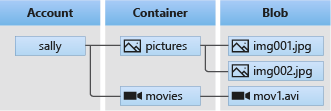

Utilice las siguientes clases de Python para interactuar con estos recursos:

- **BlobServiceClient** : la BlobServiceClientclase permite manipular los recursos de Azure Storage y los contenedores de blobs.
- **ContainerClient**: la ContainerClientclase  permite manipular contenedores de Azure Storage y sus blobs.
- **BlobClient**: la BlobClientclase  permite manipular blobs de Azure Storage.

En la cuenta de almacenamiento, cada blob debe almacenarse en un contenedor.Se puede pensar en un contenedor como una carpeta raíz para los blobs, de modo que se puede crear un contenedor de imágenes y un contenedor de audios por ejemplo.

Los blobs se guardan dentro de los contenedores. Por ejemplo si guardaramos una imagen con el nombre logo.png en el contenedor de imágenes en una cuenta de almacenamiento con el nombre de myStorageAccount, la URL de esta imagen sería:
https://mystorageaccount.blob.windows.core.net/images/logo.png

Por ello, el nombre de la cuenta de almacenamiento debe ser único.

### Administración del Blob Storage con Python

Los blobs son objetos que pueden contener grandes cantidades de texto o datos binarios, incluidas imágenes, documentos, medios de transmisión y datos de archivo.

#### Instalar el paquete

In [2]:
pip install azure-storage-blob

#### Crear un contenedor

In [ ]:
# Create the BlobServiceClient object which will be used to create a container client
blob_service_client = BlobServiceClient.from_connection_string(connect_str)

# Create a unique name for the container
container_name = str(uuid.uuid4())

# Create the container
container_client = blob_service_client.create_container(container_name)

#### Cargar blobs en un contenedor

El siguiente fragmento de código:

1. Crea un directorio local para almacenar archivos de datos.
2. Crea un archivo de texto en el directorio local.
3. Obtiene una referencia a un objeto BlobClient llamando al método get_blob_client en BlobServiceClient desde la sección Crear un contenedor .
4. Carga el archivo de texto local en el blob llamando al método upload_blob 

In [ ]:
# Create a local directory to hold blob data
local_path = "./data"
os.mkdir(local_path)

# Create a file in the local data directory to upload and download
local_file_name = str(uuid.uuid4()) + ".txt"
upload_file_path = os.path.join(local_path, local_file_name)

# Write text to the file
file = open(upload_file_path, 'w')
file.write("Hello, World!")
file.close()

# Create a blob client using the local file name as the name for the blob
blob_client = blob_service_client.get_blob_client(container=container_name, blob=local_file_name)

print("\nUploading to Azure Storage as blob:\n\t" + local_file_name)

# Upload the created file
with open(upload_file_path, "rb") as data:
    blob_client.upload_blob(data)

#### Lista de los blobs en un contenedor

In [ ]:
print("\nListing blobs...")

# List the blobs in the container
blob_list = container_client.list_blobs()
for blob in blob_list:
    print("\t" + blob.name)

#### Descargar blobs

In [ ]:
# Download the blob to a local file
# Add 'DOWNLOAD' before the .txt extension so you can see both files in the data directory
download_file_path = os.path.join(local_path, str.replace(local_file_name ,'.txt', 'DOWNLOAD.txt'))
print("\nDownloading blob to \n\t" + download_file_path)

with open(download_file_path, "wb") as download_file:
    download_file.write(blob_client.download_blob().readall())

#### Eliminar un contenedor

In [ ]:
# Clean up
print("\nPress the Enter key to begin clean up")
input()

print("Deleting blob container...")
container_client.delete_container()

print("Deleting the local source and downloaded files...")
os.remove(upload_file_path)
os.remove(download_file_path)
os.rmdir(local_path)

print("Done")